In [1]:
"""
Preguntas:

P: ¿Cuánto se ganó en 2019?
P: ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?
P: ¿Qué ciudad tuvo el mayor número de ventas?
P: ¿A qué hora debemos mostrar publicidad para maximizar probabilidad de que el cliente compre el producto?
P: ¿Qué producto vendió más? ¿Por qué crees que vendió más?


Columnas

Order ID: Cada pedido recibe su propio ID de pedido que no se duplicará. Este número puede ser útil para el vendedor cuando intenta averiguar ciertos detalles sobre un pedido,
como la fecha o el estado del envío.
Product: Producto vendido.
Quantity ordered: la cantidad solicitada es la cantidad total de artículos solicitados en el pedido inicial (sin ningún cambio)
Price Each: Precio de cada producto. Order Date: Esta es la fecha en que el cliente solicita que se envíe el pedido. Purchase Address: Dirección de compra
"""

'\nPreguntas:\n\nP: ¿Cuánto se ganó en 2019?\nP: ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?\nP: ¿Qué ciudad tuvo el mayor número de ventas?\nP: ¿A qué hora debemos mostrar publicidad para maximizar probabilidad de que el cliente compre el producto?\nP: ¿Qué producto vendió más? ¿Por qué crees que vendió más?\n\n\nColumnas\n\nOrder ID: Cada pedido recibe su propio ID de pedido que no se duplicará. Este número puede ser útil para el vendedor cuando intenta averiguar ciertos detalles sobre un pedido,\ncomo la fecha o el estado del envío.\nProduct: Producto vendido.\nQuantity ordered: la cantidad solicitada es la cantidad total de artículos solicitados en el pedido inicial (sin ningún cambio)\nPrice Each: Precio de cada producto. Order Date: Esta es la fecha en que el cliente solicita que se envíe el pedido. Purchase Address: Dirección de compra\n'

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar los conjuntos de datos sin procesar

jan_data = pd.read_csv('Sales_January_2019.csv')
feb_data = pd.read_csv("Sales_February_2019.csv")
march_data = pd.read_csv("Sales_March_2019.csv")
april_data = pd.read_csv("Sales_April_2019.csv")
may_data = pd.read_csv("Sales_May_2019.csv")
june_data = pd.read_csv("Sales_June_2019.csv")
july_data = pd.read_csv("Sales_July_2019.csv")
aug_data = pd.read_csv("Sales_August_2019.csv")
sep_data = pd.read_csv("Sales_September_2019.csv")
oct_data = pd.read_csv("Sales_October_2019.csv")
nov_data = pd.read_csv("Sales_November_2019.csv")
dec_data = pd.read_csv("Sales_December_2019.csv")

## Tratamiento de datos

In [4]:
# Unir todos los datasets

lista_datas = [jan_data, feb_data, march_data, april_data ,may_data,june_data, july_data, aug_data, sep_data, oct_data, nov_data, dec_data]

In [5]:
# Visualizamos las primeras 5 filas

df  = pd.concat(lista_datas, axis = 0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [6]:
# Visualizamos el tamaño del dataset

df.shape

(186850, 6)

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df = df.dropna(how='all', inplace=False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
# Visualizar el tipo de datos de la columnas

df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
# Convertir el tipo de datos de las columnas

df['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [12]:
df = df.drop(df[df['Price Each']=='Price Each'].index)

In [13]:
df['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', '700.0', '150.0', '300.0', '1700.0',
       '400.0'], dtype=object)

In [14]:
# La columna Quantity Ordered posee en algunas filas incorrecta la cantidad, se eliminan esas filas donde la cantidad es "Quantity Ordered"

df['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [15]:
df = df.drop(df[df['Quantity Ordered']=='Quantity Ordered'].index)

In [16]:
df['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6', '9', '8'], dtype=object)

In [17]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).astype(int)
df['Price Each'] = pd.to_numeric(df['Price Each']).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-17-5f85bd5d13dd>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [18]:
df.dtypes


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [19]:
# Obtener la ubicación y el estado

df["Consumer_Primary_Location"] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St


In [20]:
df["Consumer_State"] =  df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location,Consumer_State
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland


In [21]:
df['Month'] = df['Order Date'].dt.month
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Consumer_Primary_Location,Consumer_State,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,1


In [22]:
# Obtenemos la hora de los pedidos

df['time'] = df['Order Date'].dt.hour
df['time'].head(5)

0    21
1    14
2    13
3    20
4    11
Name: time, dtype: int32

## Preguntas

In [23]:
# ¿Cuánto se ganó en 2019?
ganancias = round((df['Quantity Ordered'] * df['Price Each']).sum(),2)
print(f'Las ganancias en el año 2019 fueron de; ', {ganancias})

Las ganancias en el año 2019 fueron de;  {33879779.77}


In [24]:
# P: ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?

df['Revenue'] = df['Quantity Ordered'] * df['Price Each']
df['Revenue']

0        700.00
1         14.95
2         23.98
3        149.99
4         11.99
          ...  
25112     14.95
25113      7.68
25114    400.00
25115     11.99
25116     99.99
Name: Revenue, Length: 182735, dtype: float64

In [27]:
ganancias_mes = df[['Revenue', 'Month']].groupby('Month').sum().reset_index()
ganancias_mes = ganancias_mes.sort_values('Revenue', ascending = False)
ganancias_mes

,Month,Revenue
11,12,4557905.42
9,10,3679254.16
3,4,3336376.42
10,11,3149785.09
4,5,3101881.04
2,3,2755969.40
6,7,2587444.91
5,6,2524464.99
7,8,2191698.31
1,2,2158127.48


In [28]:
print(ganancias_mes)
print("El mejor mes para las ventas es el número:", ganancias_mes.index[0], " con una cuantía de:", ganancias_mes['Revenue'].iloc[0])

    Month     Revenue
11     12  4557905.42
9      10  3679254.16
3       4  3336376.42
10     11  3149785.09
4       5  3101881.04
2       3  2755969.40
6       7  2587444.91
5       6  2524464.99
7       8  2191698.31
1       2  2158127.48
8       9  2050361.26
0       1  1786511.29
El mejor mes para las ventas es el número: 11  con una cuantía de: 4557905.42


In [36]:
x = ganancias_mes.index
y = ganancias_mes['Revenue']

Text(0.5, 1.0, 'Ganancias por mes')

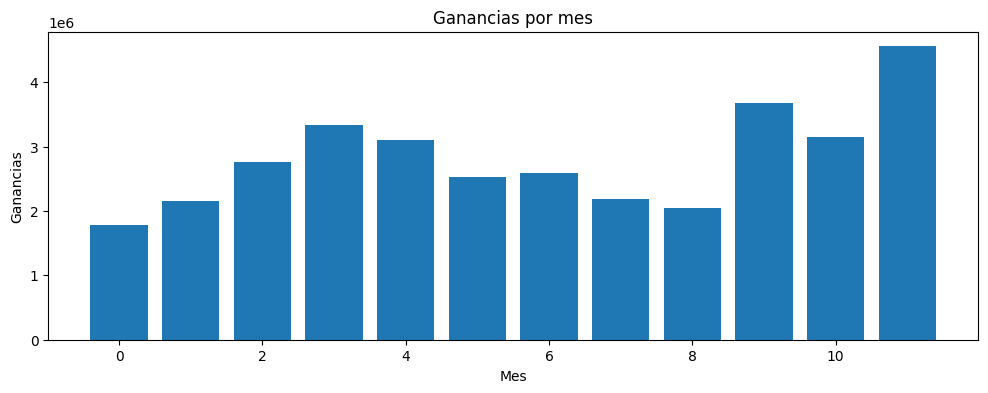

In [40]:

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x, y)
ax.set_xlabel('Mes')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias por mes')

In [29]:
#P: ¿Qué ciudad tuvo el mayor número de ventas?

ciudad_ordenes = df[['Consumer_State', 'Quantity Ordered']].groupby('Consumer_State').sum().reset_index()
ciudad_ordenes

,Consumer_State,Quantity Ordered
0,Atlanta,16304
1,Austin,10933
2,Boston,22123
3,Dallas,16453
4,Los Angeles,32722
5,New York City,27470
6,Portland,13806
7,San Francisco,49363
8,Seattle,16281


In [30]:
ciudad_ordenes = ciudad_ordenes.sort_values('Quantity Ordered', ascending = False)
print("La ciudad con el mayor numero de ventas es :", ciudad_ordenes['Consumer_State'].iloc[0], " con una cuantía de:", ciudad_ordenes['Quantity Ordered'].iloc[0])
ciudad_ordenes

La ciudad con el mayor numero de ventas es :  San Francisco  con una cuantía de: 49363


,Consumer_State,Quantity Ordered
7,San Francisco,49363
4,Los Angeles,32722
5,New York City,27470
2,Boston,22123
3,Dallas,16453
0,Atlanta,16304
8,Seattle,16281
6,Portland,13806
1,Austin,10933


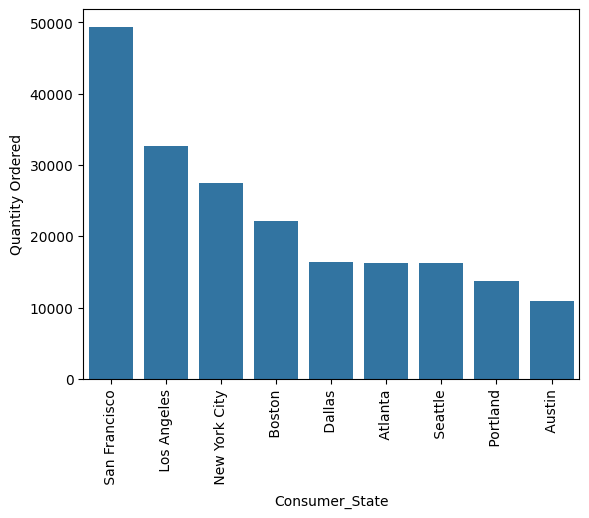

In [42]:
plt_1 = sns.barplot(x=ciudad_ordenes['Consumer_State'],
                    y=ciudad_ordenes['Quantity Ordered'])

for item in plt_1.get_xticklabels():
    item.set_rotation(90)

In [31]:
# P: ¿A qué hora debemos mostrar publicidad para maximizar probabilidad de que el cliente compre el producto?

tiempo_euros = df[[ 'Revenue', 'time']].groupby('time').sum().reset_index()
tiempo_euros

,time,Revenue
0,0,698694.76
1,1,447663.86
2,2,234191.08
3,3,142976.54
4,4,161350.57
5,5,224313.72
6,6,441523.14
7,7,734595.75
8,8,1181363.76
9,9,1612498.90


In [32]:
tiempo_euros = tiempo_euros.sort_values('Revenue', ascending = False)
print("La hora para tener más ventas son las ", tiempo_euros['time'].iloc[0], " con una cuantia de", tiempo_euros['Revenue'].iloc[0], "€")
tiempo_euros

La hora para tener más ventas son las  19  con una cuantia de 2370005.59 €


,time,Revenue
19,19,2370005.59
12,12,2269676.91
11,11,2267169.73
20,20,2242856.37
18,18,2176209.65
13,13,2118394.83
17,17,2086082.23
14,14,2045085.42
21,21,2013288.02
10,10,1907179.29


In [43]:
x = tiempo_euros.index
y = tiempo_euros['Revenue']

Text(0.5, 1.0, 'Ganancia por hora')

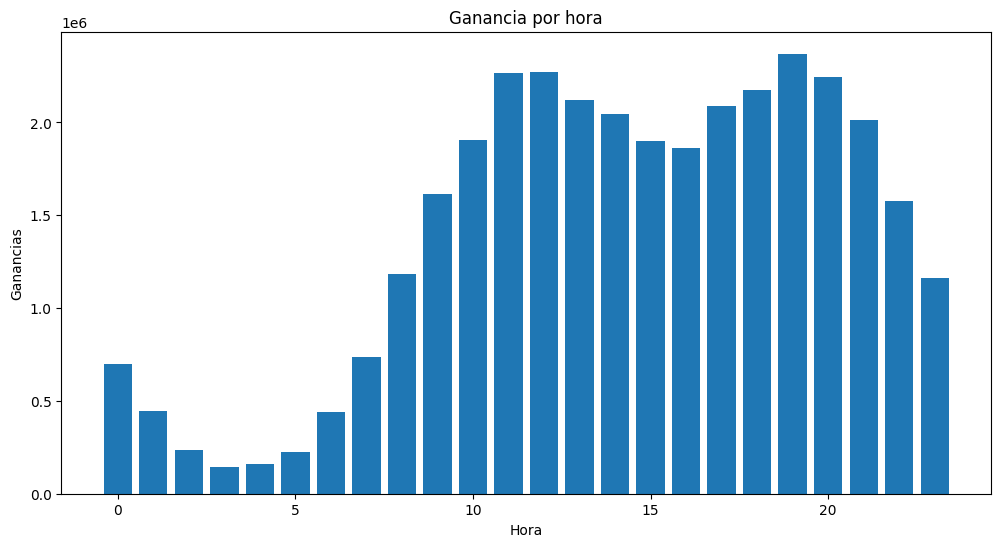

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, y)
ax.set_xlabel('Hora')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancia por hora')

In [33]:
# P: ¿Qué producto vendió más?

In [34]:
producto_mas_vendido = df[[ 'Quantity Ordered', 'Product']].groupby('Product').sum().reset_index()
producto_mas_vendido

,Product,Quantity Ordered
0,20in Monitor,4058
1,27in 4K Gaming Monitor,6134
2,27in FHD Monitor,7429
3,34in Ultrawide Monitor,6076
4,AA Batteries (4-pack),27148
5,AAA Batteries (4-pack),30487
6,Apple Airpods Headphones,15383
7,Bose SoundSport Headphones,13236
8,Flatscreen TV,4724
9,Google Phone,5440


In [35]:
producto_mas_vendido = producto_mas_vendido.sort_values('Quantity Ordered', ascending = False)
print("El producto mas vendido es ", producto_mas_vendido['Product'].iloc[0], " con una cantidad de", producto_mas_vendido['Quantity Ordered'].iloc[0], "ordenes")
producto_mas_vendido

El producto mas vendido es  AAA Batteries (4-pack)  con una cantidad de 30487 ordenes


,Product,Quantity Ordered
5,AAA Batteries (4-pack),30487
4,AA Batteries (4-pack),27148
15,USB-C Charging Cable,23555
12,Lightning Charging Cable,22841
17,Wired Headphones,20201
6,Apple Airpods Headphones,15383
7,Bose SoundSport Headphones,13236
2,27in FHD Monitor,7429
18,iPhone,6732
1,27in 4K Gaming Monitor,6134


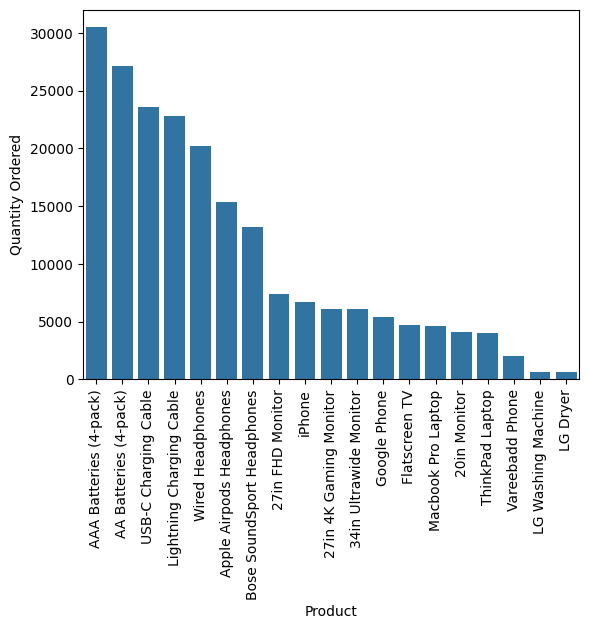

In [47]:
plt = sns.barplot(x= producto_mas_vendido['Product'],
                  y=producto_mas_vendido['Quantity Ordered'])

for item in plt.get_xticklabels():
    item.set_rotation(90)